<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0_3_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2%D0%B8%D0%B4%D0%B0_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 3. Модели вида ARIMA

## 1. Введение в прогнозирование временных рядов


Временной ряд определяется как последовательность данных, записанных в разные временные интервалы. Временной порядок может быть дневным, месячным или даже годовым.

Прогнозирование временных рядов - это процесс использования статистической модели для предсказания будущих значений временного ряда на основе прошлых результатов.



Прогнозирование - это этап, когда мы хотим предсказать будущие значения, которые примет ряд. Прогнозирование временного ряда часто имеет огромную коммерческую ценность.

#### Прогнозирование временного ряда в основном подразделяется на два типа:

- Если мы используем только предыдущие значения временного ряда, чтобы предсказать его будущие значения, это называется **прогнозирование одномерных временных рядов**.

- Если мы используем предикторы, отличные от самого ряда (например, экзогенные переменные), для прогнозирования, это называется **прогнозирование многомерных временных рядов**.

- Этот ноутбук посвящен определенному типу метода прогнозирования, называемого **моделированием ARIMA**.

## 2. Введение в модели ARIMA

Как отмечали ранее, ARIMA расшифровывается как **(англ. autoregressive integrated moving average -АвтоRegрессивнаяИнтегрированная Скользящая Средняя Модель)**. Она относится к классу моделей, которые объясняют данный временной ряд на основе его собственных прошлых значений, то есть собственных лагов и лаговых ошибок прогноза. Уравнение может использоваться для прогнозирования будущих значений. Любой "несезонный" временной ряд, который демонстрирует определенные закономерности и не является случайным белым шумом, может быть смоделирован с помощью моделей ARIMA.

Модели ARIMA задаются тремя порядковыми параметрами: (p, d, q),

где:

- p - порядок авторегрессионного члена
- q - порядок члена скользящего среднего
- d - число раз необходимых для дифференцирования, чтобы сделать временной ряд стационарным

Существуют различные типы ARIMA-моделей:
- ARIMA - Несезонные авторегрессивные интегрированные скользящие средние
- SARIMA - Сезонные ARIMA
- SARIMAX - Сезонные ARIMA с экзогенными переменными

Если временной ряд имеет сезонные закономерности, необходимо добавить сезонные члены, и тогда это будет SARIMA, короткое название для **Сезонная ARIMA**.

## 3. Значение p, d и q в модели ARIMA



### 3.1 Значение p

`p` - это порядок **автоРегрессивного (AR)** члена. Он относится к количеству лагов Y, которые будут использоваться в качестве предикторов.

### 3.2 Значение d

Термин **автоРегрессивный** в ARIMA означает, что это линейная регрессионная модель, которая использует свои собственные лаги в качестве предикторов. Линейные регрессионные модели, как мы знаем, работают лучше всего, когда предикторы не коррелированы и независимы друг от друга. Поэтому нам нужно сделать временной ряд стационарным.

Наиболее распространенный подход к обеспечению стационарности - это дифференцирование. То есть, вычитание предыдущего значения из текущего значения. Иногда, в зависимости от сложности ряда, может потребоваться более одного дифференцирования.

Значение `d`, таким образом, является минимальным количеством операций дифференцирования, необходимых для обеспечения стационарности ряда. Если временной ряд уже является стационарным, то `d = 0`.

### 3.3 Значение q

`q` - это порядок **скользящего среднего (MA)** члена. Он относится к количеству лаговых ошибок прогноза, которые должны быть включены в модель ARIMA.

## 4. Модели авторегрессии (AR) и скользящего среднего (MA)

### 4.1 Модель авторегрессии (AR)

Модель авторегрессии (AR) является класcом линейных моделей временных рядов, в которых текущее значение зависимой переменной \[Y_t\] определяется как линейная функция от предыдущих значений той же переменной. Модель AR представляется следующим уравнением:

$$
Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \beta_p Y_{t-p} + \varepsilon_t
$$

где:
- $\alpha$- константа (свободный член);
- $\beta_1, \beta_2, ..., \beta_p$ - коэффициенты авторегрессии, отражающие влияние предыдущих значений $Y_t$ на текущее значение;
- $Y_{t-1}, Y_{t-2}, ..., Y_{t-p}$ - предыдущие значения зависимой переменной;
- $\varepsilon_t$- случайная ошибка в момент времени $t$.

Таким образом, модель AR описывает, как текущее значение $Y_t$ зависит от своих предыдущих значений, учитывая при этом также и случайную составляющую $\varepsilon_t$.

### **4.2 Модель скользящего среднего (MA)**


Модель скользящего среднего (MA) является другим классом линейных моделей временных рядов, в которых текущее значение зависимой переменной $Y_t$ определяется как линейная функция от предыдущих значений случайных ошибок. Данная модель представляется следующим уравнением:

$$
Y_t = \alpha + \phi_1 \varepsilon_{t-1} + \phi_2 \varepsilon_{t-2} + ... + \phi_q \varepsilon_{t-q} + \varepsilon_t
$$

где:
- $\alpha$ - константа (среднее значение процесса);
- $\phi_1, \phi_2, ..., \phi_q$ - коэффициенты скользящего среднего, отражающие влияние предыдущих ошибок $\varepsilon_{t-1}, \varepsilon_{t-2}, ..., \varepsilon_{t-q}$ на текущее значение $Y_t$;
- $\varepsilon_{t-1}, \varepsilon_{t-2}, ..., \varepsilon_{t-q}$ - предыдущие значения случайных ошибок;
- $\varepsilon_t$ - случайная ошибка в момент времени $t$.

Члены ошибок $\varepsilon_t$ и $\varepsilon_{t-1}$ представляют собой ошибки следующих уравнений:

$$
Y_t = \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \beta_0 Y_{0} + \varepsilon_t
$$

$$
Y_t =  \beta_1 Y_{t-2} + \beta_2 Y_{t-3} + ... + \beta_0 Y_{0} + \varepsilon_{t-1}
$$

Таким образом, модель MA описывает, как текущее значение $Y_t$ зависит от предыдущих случайных ошибок, учитывая при этом также и случайную составляющую $\varepsilon_t$.

Следовательно, мы рассмотрели как модели авторегрессии (AR), так и модели скользящего среднего (MA). Эти две модели могут быть объединены в более общий класс моделей, называемый моделями ARMA, которые будут рассмотрены в следующем разделе.

### **4.3 ARIMA модель**

Модель ARIMA (Autoregressive Integrated Moving Average) объединяет в себе модели авторегрессии (AR) и скользящего среднего (MA). Она применяется в случаях, когда временной ряд необходимо преобразовать в стационарный путем взятия разностей.

Уравнение модели ARIMA имеет следующий вид:

$$
Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \beta_p Y_{t-p} + \phi_1 \varepsilon_{t-1} + \phi_2 \varepsilon_{t-2} + ... + \phi_q \varepsilon_{t-q}
$$

где:
- $\alpha$ - константа;
- $\beta_1, \beta_2, ..., \beta_p$ - коэффициенты авторегрессии;
- $\phi_1, \phi_2, ..., \phi_q$ - коэффициенты скользящего среднего;
- $\varepsilon_{t-1}, \varepsilon_{t-2}, ..., \varepsilon_{t-q}$ - предыдущие значения случайных ошибок.

**Интерпретация модели ARIMA**

Текущее значение $Y_t$ представляет собой линейную комбинацию:
- Константы $\alpha$
- Линейной комбинации предыдущих значений $Y$ (до $p$ лагов) с коэффициентами $\beta_i$
- Линейной комбинации лагированных случайных ошибок (до $q$ лагов) с коэффициентами $\phi_i$

Таким образом, модель ARIMA объединяет в себе преимущества моделей AR и MA, позволяя эффективно моделировать нестационарные временные ряды.

### **4.4 Сезонная ARIMA (SARIMA) модель**

Сезонная ARIMA, или SARIMA (Seasonal Autoregressive Integrated Moving Average) модель, является расширением модели ARIMA, которая учитывает сезонные компоненты временного ряда.

Уравнение модели SARIMA имеет следующий вид:

$$
Y_t = \alpha + \Phi_1 Y_{t-s} + \Phi_2 Y_{t-2s} + ... + \Phi_P Y_{t-Ps} + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \beta_p Y_{t-p} + \phi_1 \varepsilon_{t-1} + \phi_2 \varepsilon_{t-2} + ... + \phi_q \varepsilon_{t-q} + \Theta_1 \varepsilon_{t-s} + \Theta_2 \varepsilon_{t-2s} + ... + \Theta_Q \varepsilon_{t-Qs}
$$

где:
- $\alpha$ - константа;
- $\Phi_1, \Phi_2, ..., \Phi_P$ - коэффициенты сезонной авторегрессии;
- $\beta_1, \beta_2, ..., \beta_p$ - коэффициенты несезонной авторегрессии;
- $\phi_1, \phi_2, ..., \phi_q$ - коэффициенты несезонного скользящего среднего;
- $\Theta_1, \Theta_2, ..., \Theta_Q$ - коэффициенты сезонного скользящего среднего;
- $\varepsilon_{t-1}, \varepsilon_{t-2}, ..., \varepsilon_{t-q}, \varepsilon_{t-s}, \varepsilon_{t-2s}, ..., \varepsilon_{t-Qs}$ - предыдущие значения случайных ошибок.

 **Интерпретация модели SARIMA**

Текущее значение $Y_t$ представляет собой линейную комбинацию:
- Константы $\alpha$
- Сезонной авторегрессионной компоненты с коэффициентами $\Phi_i$
- Линейной комбинации предыдущих значений $Y$ (до $p$ лагов) с коэффициентами $\beta_i$
- Линейной комбинации лагированных случайных ошибок (до $q$ лагов) с коэффициентами $\phi_i$
- Сезонной компоненты скользящего среднего с коэффициентами $\Theta_i$

Таким образом, модель SARIMA является более общей и гибкой, чем ARIMA, позволяя моделировать как несезонные, так и сезонные временные ряды.

### **4.5 Сезонная ARIMA с экзогенными переменными (SARIMAX)**

Модель SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous inputs) является расширением модели SARIMA, которая включает в себя дополнительные экзогенные переменные для повышения точности прогнозирования.

Уравнение модели SARIMAX имеет следующий вид:

$$
Y_t = \alpha + \Phi_1 Y_{t-s} + \Phi_2 Y_{t-2s} + ... + \Phi_P Y_{t-Ps} + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \beta_p Y_{t-p} + \phi_1 \varepsilon_{t-1} + \phi_2 \varepsilon_{t-2} + ... + \phi_q \varepsilon_{t-q} + \Theta_1 \varepsilon_{t-s} + \Theta_2 \varepsilon_{t-2s} + ... + \Theta_Q \varepsilon_{t-Qs} + \gamma_1 X_{t-1} + \gamma_2 X_{t-2} + ... + \gamma_k X_{t-k}
$$

где:
- $\alpha$ - константа;
- $\Phi_1, \Phi_2, ..., \Phi_P$ - коэффициенты сезонной авторегрессии;
- $\beta_1, \beta_2, ..., \beta_p$ - коэффициенты несезонной авторегрессии;
- $\phi_1, \phi_2, ..., \phi_q$ - коэффициенты несезонного скользящего среднего;
- $\Theta_1, \Theta_2, ..., \Theta_Q$ - коэффициенты сезонного скользящего среднего;
- $\gamma_1, \gamma_2, ..., \gamma_k$ - коэффициенты экзогенных переменных;
- $X_{t-1}, X_{t-2}, ..., X_{t-k}$ - значения экзогенных переменных в предыдущие моменты времени;
- $\varepsilon_{t-1}, \varepsilon_{t-2}, ..., \varepsilon_{t-q}, \varepsilon_{t-s}, \varepsilon_{t-2s}, ..., \varepsilon_{t-Qs}$ - предыдущие значения случайных ошибок.

**Интерпретация модели SARIMAX**

Текущее значение $Y_t$ представляет собой линейную комбинацию:
- Константы $\alpha$
- Сезонной авторегрессионной компоненты с коэффициентами $\Phi_i$
- Линейной комбинации предыдущих значений $Y$ (до $p$ лагов) с коэффициентами $\beta_i$
- Линейной комбинации лагированных случайных ошибок (до $q$ лагов) с коэффициентами $\phi_i$
- Сезонной компоненты скользящего среднего с коэффициентами $\Theta_i$
- Линейной комбинации экзогенных переменных (до $k$ лагов) с коэффициентами $\gamma_i$

Модель SARIMAX является более гибкой и может учитывать влияние дополнительных факторов на прогнозируемый временной ряд, повышая точность прогнозирования.

# **5. Определение порядка дифференцирования (d) в модели ARIMA**


В предыдущем разделе было отмечено, что целью дифференцирования является приведение временного ряда к стационарному виду. Однако следует быть осторожным, чтобы не переборщить с дифференцированием. Чрезмерно дифференцированный ряд может все еще оставаться стационарным, что в свою очередь будет влиять на параметры модели.

Таким образом, необходимо определить оптимальный порядок дифференцирования. Оптимальный порядок дифференцирования - это минимальное дифференцирование, необходимое для получения почти стационарного ряда, который колеблется вокруг определенного среднего значения, а АКФ быстро стремится к нулю.

Если автокорреляции положительны в течение многих лагов (10 или более), то ряд нуждается в дальнейшем дифференцировании. С другой стороны, если автокорреляция на лаге 1 слишком отрицательна, то ряд, вероятно, переборщен с дифференцированием.

Если мы не можем определиться между двумя порядками дифференцирования, то мы выбираем тот порядок, который дает наименьшее стандартное отклонение в дифференцированном ряде.

Далее мы проиллюстрируем эти концепции на примере:

Во-первых, я проверю, является ли ряд стационарным, используя **расширенный тест Дики-Фуллера (ADF-тест)** из пакета statsmodels. Причина в том, что дифференцирование требуется только в том случае, если ряд нестационарен. Иначе дифференцирование не нужно, то есть d=0.

Нулевая гипотеза (H0) теста ADF состоит в том, что временной ряд нестационарен. Таким образом, если p-значение теста меньше уровня значимости (0.05), мы отвергаем нулевую гипотезу и делаем вывод, что временной ряд действительно стационарен.

Следовательно, в нашем случае, если p-значение > 0.05, мы переходим к определению порядка дифференцирования.

В рамках данной выпускной квалификационной работы исследуется набор данных "Tesla Stock Data from 2010 to 2020", который содержит следующие характеристики:

- Date - дата торгового дня
- Open - цена открытия акций в этот день
- High - максимальная цена акций в течение дня
- Low - минимальная цена акций в течение дня
- Close - цена закрытия акций в этот день
- Volume - объем торгов акциями в этот день
- OpenInt - открытый интерес (количество открытых позиций по фьючерсным контрактам) на конец дня

Данный набор данных включает в себя ежедневные котировки акций компании Tesla за период с 2010 по 2020 год. Он содержит подробную информацию об изменении цен, объемах торгов и открытом интересе, которая может быть полезна для проведения различных финансовых и инвестиционных анализов.

На первом этапе установим импортируем необходимые библиотеки.

In [ ]:
!pip install pmdarima
#!pip3 install pyramid-arima
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00


In [ ]:
# Основные научные и визуализационные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import table
import datetime as dt

# Библиотеки для анализа временных рядов
from statsmodels.tsa.stattools import pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Специализированные библиотеки
import pmdarima as pm
import os

Затем загружаем датасеть

In [ ]:
path = '/content/dataset.txt'

Data = pd.read_csv(path)

Data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Визуализируем наш датасет:

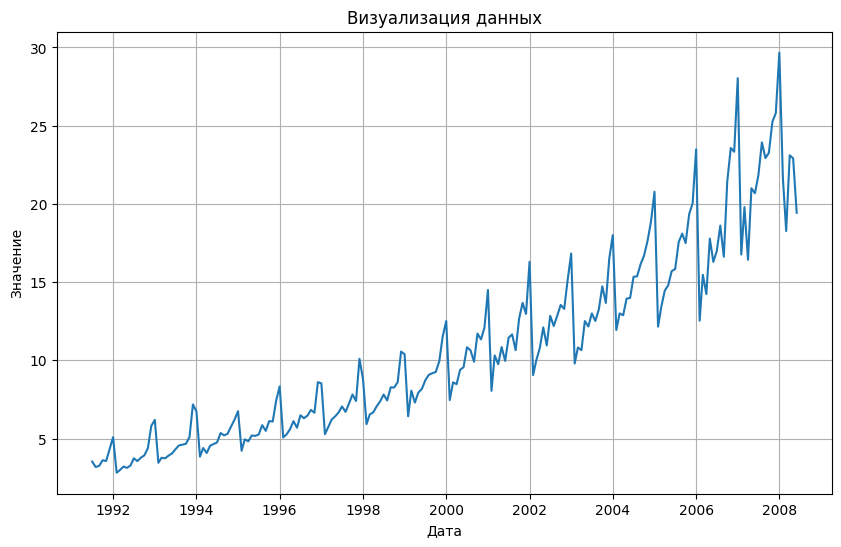

In [ ]:
# Визуализация данных
# Конвертируем 'date' в datetime
Data['date'] = pd.to_datetime(Data['date'])

# Создаем диаграмму
plt.figure(figsize=(10, 6))
plt.plot(Data['date'], Data['value'])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Визуализация данных')
plt.grid()
plt.show()

Для дальнейшего анализа создадим новый датасет из столбцов Date и Open:



In [ ]:
targetfeature='Value'
# Переименовываем колонку 'date' в 'Date'
Data = Data.rename(columns={'date': 'Date'})
# Переименовываем колонку 'value' в 'Value'
Data = Data.rename(columns={'value': targetfeature})
Data.head(5)

df=Data.copy()
df.rename(columns={targetfeature: 'Value'}, inplace=True)
df.head(5)

,Date,Value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Данный датасет будет содержать только две характеристики - дату и цену открытия акций Tesla. Это позволит нам сосредоточиться на изучении динамики цен открытия, отбросив остальные показатели на первом этапе анализа.

Теперь сделаем характеристику "Date" в качестве индекса:

In [ ]:
#df["Date"] = pd.to_datetime(df["Date"])
#df = df.set_index("Date")



Это позволит нам работать с данными по датам как с индексом, что упростит дальнейший анализ временных рядов.

Проверим тест на стационарность временного ряда:

In [ ]:
result = adfuller(df.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


На основании предоставленных значений статистики ADF (Augmented Dickey-Fuller) и p-value можно сделать следующие выводы:

1. ADF Statistic: 3.145186
   - Статистика ADF показывает, насколько тестируемый временной ряд отличается от нестационарного ряда с единичным корнем.
   - Значение 3.145186 меньше, чем критические значения ADF для различных уровней значимости (например, -3.43 для 1%, -2.86 для 5%, -2.57 для 10%).
   - Это означает, что мы не можем отвергнуть нулевую гипотезу о наличии единичного корня в данном временном ряду.

2. p-value: 1.000000
   - P-value равен 1.000000, что намного больше распространенных уровней значимости (0.01, 0.05, 0.1).
   - Высокое значение p-value указывает на то, что мы не можем отвергнуть нулевую гипотезу о нестационарности временного ряда.

Вывод: Согласно результатам теста ADF, можно сделать вывод, что данный временной ряд, вероятнее всего, является нестационарным, то есть имеет единичный корень. Для дальнейшего анализа или моделирования этого ряда может потребоваться применение методов для обработки нестационарных данных, таких как дифференцирование или использование моделей, учитывающих наличие единичного корня.

С учетом этих результатов теста Дики-Фуллера можно сделать следующие выводы:

- ADF Statistic: -0.842866
- p-value: 0.806205

Поскольку полученное значение p-value (0.806205) больше стандартного уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу о наличии единичного корня в ряде. Это означает, что временной ряд цен закрытия акций Tesla не является стационарным.

Не стационарность временного ряда говорит о том, что средние и дисперсия ряда меняются со временем, что может привести к некорректным результатам при применении многих статистических методов анализа.

Для устранения нестационарности может потребоваться применение различных методов преобразования данных, таких как взятие первых разностей, логарифмирование или другие виды трансформаций.

Дальнейший анализ данных будет зависеть от того, можно ли сделать временной ряд стационарным с помощью подходящих методов.

Визуализация временного ряда данных и оценка его стационарности.

In [ ]:
!pip install --upgrade statsmodels

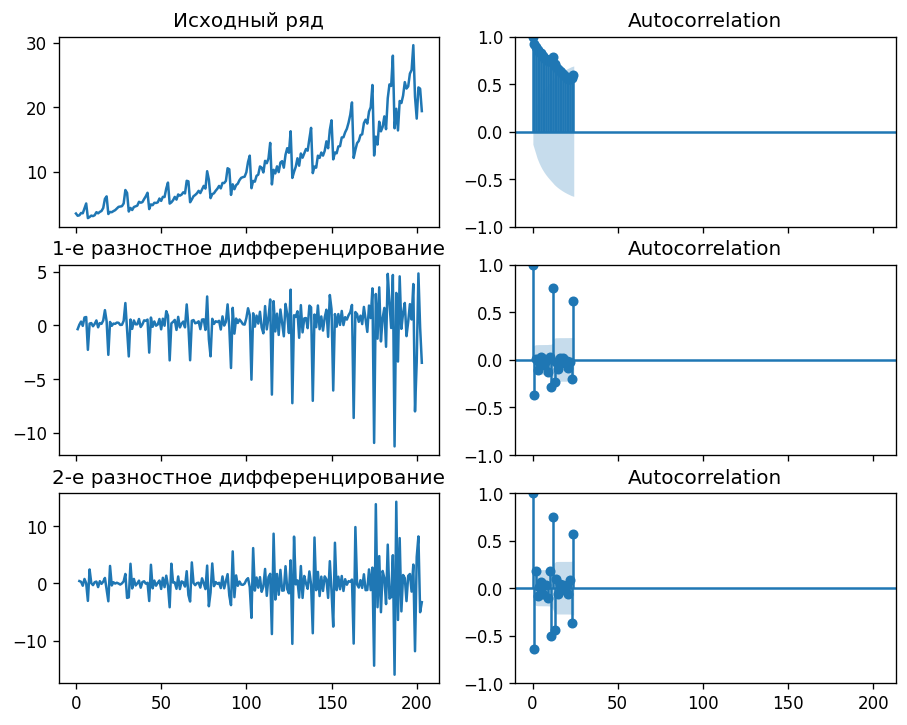

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Исходный ряд
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Value); axes[0, 0].set_title('Исходный ряд')
plot_acf(df.Value, ax=axes[0, 1])

# 1-е дифференцирование
axes[1, 0].plot(df.Value.diff()); axes[1, 0].set_title('1-е разностное дифференцирование')
plot_acf(df.Value.diff().dropna(), ax=axes[1, 1])

# 2-е дифференцирование
axes[2, 0].plot(df.Value.diff().diff()); axes[2, 0].set_title('2-е разностное дифференцирование')
plot_acf(df.Value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Это код на Python, который используется для визуализации временного ряда данных и оценки его стационарности.

Вот что делает этот код:

1. Импортирует необходимые библиотеки - `statsmodels.graphics.tsaplots` для построения графиков автокорреляции и частичной автокорреляции, и `matplotlib.pyplot` для построения графиков.
2. Обновляет параметры отображения графиков, устанавливая размер и разрешение.
3. Создает три ряда графиков:
   - Первый ряд показывает исходный временной ряд и его автокорреляционную функцию (ACF).
   - Второй ряд показывает временной ряд после первого дифференцирования и его ACF.
   - Третий ряд показывает временной ряд после второго дифференцирования и его ACF.
4. Цель этого анализа - оценить стационарность временного ряда. Если исходный ряд не стационарен, то дифференцирование может сделать его стационарным.
5. В конце вызывается `plt.show()` для отображения всех созданных графиков.

Этот код может быть полезен при анализе временных рядов, например, при моделировании финансовых или экономических данных.

Далее визуализируются различные статистические показатели, такие как цена закрытия, скользящие средние и стандартное отклонение, а также проверяется стационарность временного ряда цены закрытия акций Tesla.

(3.14518568930673,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364174)

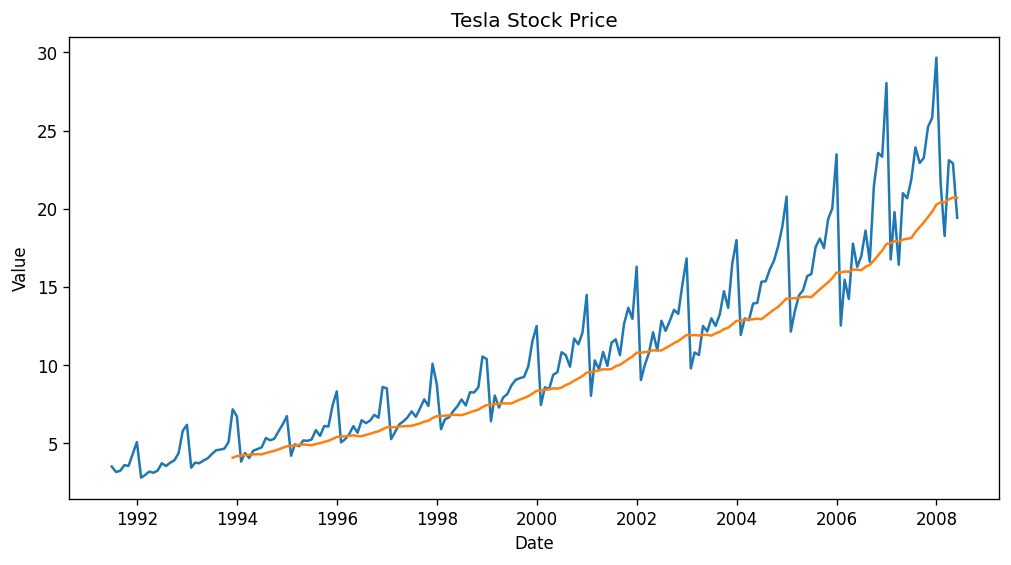

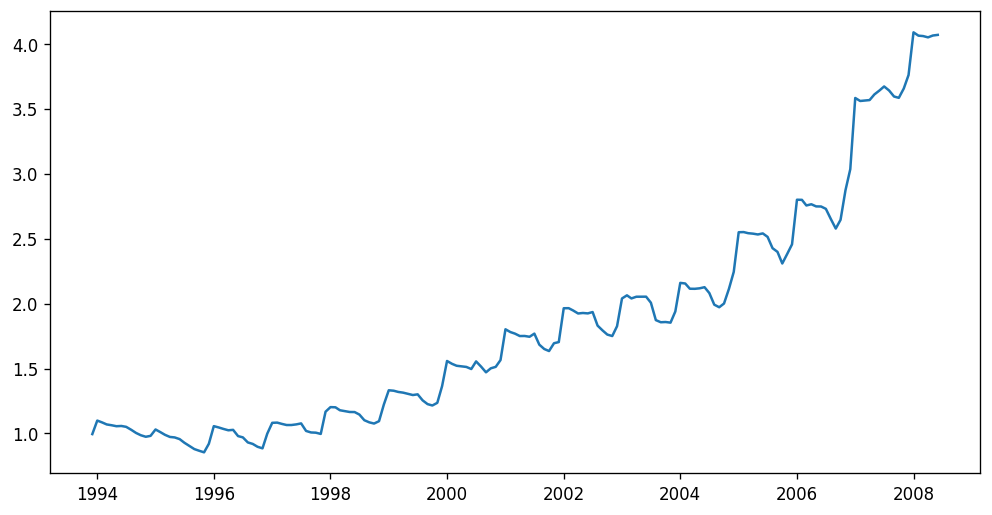

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df, x='Date', y='Value')
plt.title('Tesla Stock Price')

#Montly Simple Moving Average
plt.plot(df.Date,df.Value.rolling(30).mean())

# Yearly Simple Moving Average
sns.lineplot(x=df.Date,y=df.Value.rolling(365).mean())

#Montly Standard deviation of Data
plt.figure(figsize=(10,5))
plt.plot(df.Date,df.Value.rolling(30).std())

from statsmodels.tsa.stattools import adfuller
adfuller(df.Value, autolag='AIC')

Этот код представляет собой анализ временных рядов для акций компании Tesla. Рассмотрим каждую часть кода подробнее:

1. `plt.figure(figsize=(10,5))`: Создает новую фигуру (окно) с размерами 10x5 дюймов.
2. `sns.lineplot(uf, x='Date', y='Close')`: Строит линейный график цены закрытия акций Tesla в зависимости от даты, используя библиотеку Seaborn.
3. `plt.title('Tesla Stock Price')`: Устанавливает заголовок графика.
4. `plt.plot(uf['Date'],uf['Close'].rolling(30).mean())`: Рассчитывает и отображает 30-дневную простую скользящую среднюю цены закрытия акций.
5. `sns.lineplot(x=uf['Date'],y=uf['Close'].rolling(365).mean())`: Строит линейный график 365-дневной простой скользящей средней цены закрытия акций.
6. `plt.figure(figsize=(10,5))`: Создает новую фигуру (окно) с размерами 10x5 дюймов.
7. `plt.plot(uf['Date'],uf['Close'].rolling(30).std())`: Рассчитывает и отображает 30-дневное скользящее стандартное отклонение цены закрытия акций.
8. `from statsmodels.tsa.stattools import adfuller`: Импортирует функцию Augmented Dickey-Fuller (ADF) из библиотеки statsmodels для проверки стационарности временного ряда.
9. `adfuller(uf['Close'], autolag='AIC')`: Применяет тест Augmented Dickey-Fuller к столбцу 'Close', чтобы проверить стационарность временного ряда цены закрытия акций.

Этот код позволяет визуализировать различные статистические показатели, такие как цена закрытия, скользящие средние и стандартное отклонение, а также проверить стационарность временного ряда цены закрытия акций Tesla.

**Как определить порядок авторегрессионного члена (p)**



- Следующий шаг - определить, нужны ли модели какие-либо авторегрессионные члены. Мы узнаем необходимое число авторегрессионных членов, изучив **график частной автокорреляции (PACF)**.


- **Частная автокорреляция** может быть представлена как корреляция между рядом и его лагом, после исключения вклада промежуточных лагов. Таким образом, PACF передает чистую корреляцию между лагом и рядом. Это позволяет нам понять, нужен ли этот лаг в авторегрессионном члене или нет.


- Частная автокорреляция лага (k) ряда - это коэффициент этого лага в уравнении авторегрессии для Y.


$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- Другими словами, если $Y_t$ - это текущий ряд, а $Y_{t-1}$ - лаг 1 для Y, то частная автокорреляция лага 3 $(Y_{t-3})$ - это коэффициент $\alpha_3$ $Y_{t-3}$ в приведенном выше уравнении.


- Теперь нужно определить число авторегрессионных членов. Любая автокорреляция в стационарном ряде может быть исправлена путем добавления достаточного числа авторегрессионных членов. Поэтому первоначально порядок авторегрессионного члена устанавливается равным количеству лагов, пересекающих предел значимости на графике PACF.

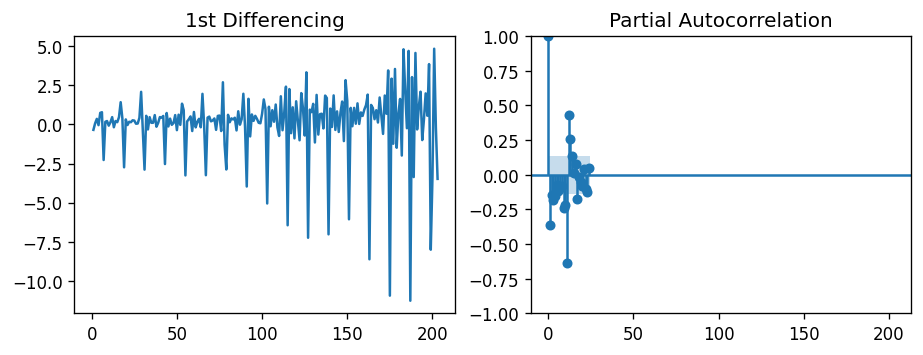

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Value.diff().dropna(), ax=axes[1])

plt.show()

Это код Python, который создает график автокорреляционной функции частичной (PACF) для первой дифференцированной (разностной) временной серии данных.

Вот что делает этот код:

1. Обновляет параметры фигуры Matplotlib, чтобы установить размер фигуры (9x3 дюйма) и разрешение (120 точек на дюйм).

2. Создает фигуру с двумя субплотами, размещенными горизонтально.

3. На первом субплоте рисует график первой дифференцированной серии данных (df.Close.diff()).

4. На втором субплоте рисует график PACF для первой дифференцированной серии данных (plot_pacf(df.Close.diff().dropna(), ax=axes[1])).

5. Ограничивает y-ось второго субплота в диапазоне от 0 до 5.

6. Выводит построенную фигуру на экран.

Этот код может быть полезен для анализа стационарности временных рядов и определения порядка авторегрессионной модели (AR) для моделирования данных.

- We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

**7. Как определить порядок члена скользящего среднего (q)**


- Так же, как мы смотрели на график PACF для определения числа авторегрессионных членов, мы будем смотреть на график АКФ (ACF) для определения числа членов скользящего среднего. Член скользящего среднего (MA) - это по сути ошибка прогноза с лагом.


- График АКФ показывает, сколько членов скользящего среднего нужно, чтобы устранить любую автокорреляцию в стационарном ряде.


- Давайте посмотрим на график автокорреляции дифференцированного ряда.

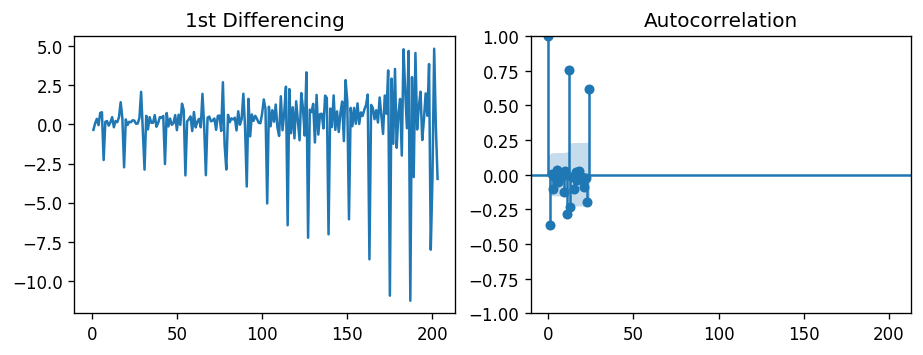

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Value.diff().dropna(), ax=axes[1])

plt.show()

Мы можем видеть, что несколько лагов значительно превышают линию значимости. Поэтому мы зафиксируем q равным 2. Если возникнут какие-либо сомнения, мы будем использовать более простую модель, которая достаточно хорошо объясняет переменную Y.

**Что делать, если временной ряд немного недодифференцирован или передифференцирован**


Может случиться, что временной ряд немного недодифференцирован. Дифференцирование его еще раз может сделать его немного передифференцированным.

Если ряд немного недодифференцирован, добавление одного или более дополнительных авторегрессионных членов обычно решает эту проблему. Точно так же, если он немного передифференцирован, мы попробуем добавить дополнительный член скользящего среднего.

**Как построить модель ARIMA**

Теперь мы определили значения p, d и q. У нас есть всё необходимое для построения модели ARIMA. Мы будем использовать реализацию ARIMA() из библиотеки statsmodels.

In [ ]:
df.head(5)

,Date,Value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
# 1,1,2 ARIMA Model
model = ARIMA(df['Value'], order=(1, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Tue, 04 Jun 2024   AIC                            857.140
Time:                        14:04:34   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

Сводка модели предоставляет много информации. Таблица в середине - это таблица коэффициентов, где значения под "coef" являются весами соответствующих членов.

Коэффициент члена МА2 близок к нулю, а значение P в столбце 'P>|z|' является крайне незначительным. Для того, чтобы соответствующий X был значимым, это значение должно быть менее 0,05.

Таким образом, мы перестроим модель без члена МА2.

In [ ]:
# 1,1,1 ARIMA Model
model = sm.tsa.arima.ARIMA(df.Value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Tue, 04 Jun 2024   AIC                            855.524
Time:                        14:04:34   BIC                            865.463
Sample:                             0   HQIC                           859.545
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

Значение AIC модели немного уменьшилось, что является хорошим признаком. Значения p-value для членов AR1 и MA1 улучшились и стали крайне значимыми (<< 0.05).

Давайте построим график остатков, чтобы убедиться в отсутствии закономерностей (то есть проверить постоянство среднего значения и дисперсии).

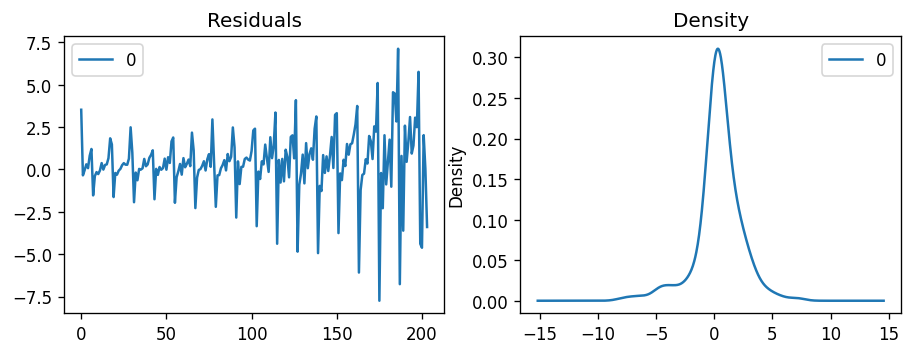

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Остаточные ошибки выглядят нормально, со средним значением, близким к нулю, и равномерной дисперсией. Давайте построим график фактических значений против прогнозных с помощью функции plot_predict().



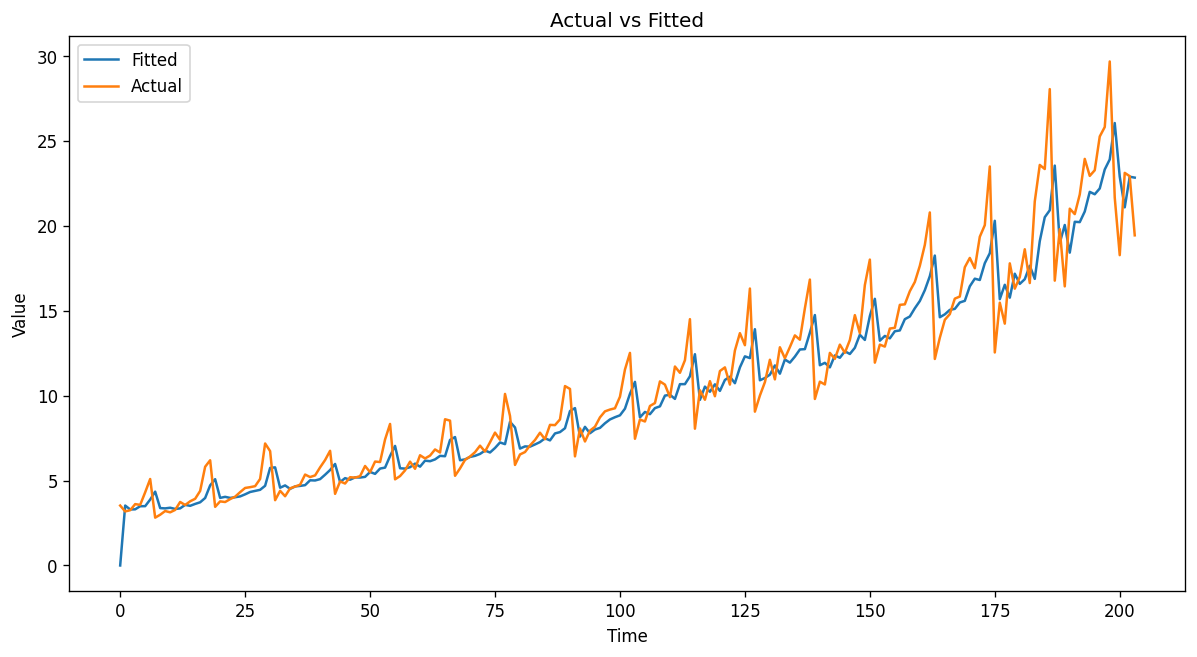

In [ ]:
# Actual vs Fitted
plt.figure(figsize=(12, 6))
plt.plot(model_fit.fittedvalues, label='Fitted')
plt.plot(df.Value, label='Actual')
plt.title('Actual vs Fitted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Когда мы устанавливаем dynamic=False, для прогноза используются предыдущие значения лагов. То есть модель обучается до предыдущего значения, чтобы сделать следующий прогноз. Это может сделать прогнозные значения и фактические данные искусственно хорошими.

Итак, у нас получилась вполне приемлемая модель ARIMA. Однако мы не можем сказать, что это лучшая модель ARIMA, потому что мы еще не прогнозировали в будущее и не сравнили прогноз с фактическим результатом.

Таким образом, нам необходимо провести реальную проверку модели - кроссвалидацию на данных, выведенных из выборки, о которой мы поговорим далее.

 **10. Поиск оптимальной модели ARIMA с помощью кроссвалидации по времени**

- При кроссвалидации по времени мы двигаемся назад во времени и прогнозируем на столько шагов вперед, на сколько мы сдвинулись назад. Затем мы сравниваем прогноз с фактическими значениями.

- Для этого мы разделим временной ряд на 2 непрерывные части в соотношении, основанном на временной частоте ряда, чтобы получить обучающую и тестовую выборки.

In [ ]:
# Create Training and Test
#train = df.Value[:85]
#test = df.Value[85:]

'''
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]'''

train_size = int(len(df) * 0.8)
train = df['Value'].iloc[:train_size]
test = df['Value'].iloc[train_size:]

Теперь мы построим модель ARIMA на обучающем наборе данных, сделаем прогноз и построим график.

In [ ]:
train

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
158    16.142005
159    16.685754
160    17.636728
161    18.869325
162    20.778723
Name: Value, Length: 163, dtype: float64

     lower Value  upper Value
163    15.815902    21.426569
164    14.747667    21.084025
165    14.331433    21.004500
166    14.125893    21.035827
167    13.993622    21.106878
168    13.888254    21.190733
169    13.793680    21.277747
170    13.704196    21.364574
171    13.617725    21.450112
172    13.533463    21.534046
173    13.451059    21.616335
174    13.370327    21.697026
175    13.291146    21.776193
176    13.213421    21.853913
177    13.137072    21.930260
178    13.062027    22.005305
179    12.988221    22.079110
180    12.915594    22.151737
181    12.844092    22.223239
182    12.773664    22.293667
183    12.704263    22.363068
184    12.635846    22.431486
185    12.568371    22.498961
186    12.501800    22.565531
187    12.436099    22.631232
188    12.371234    22.696097
189    12.307174    22.760157
190    12.243890    22.823441
191    12.181354    22.885977
192    12.119540    22.947791
193    12.058424    23.008907
194    11.997983    23.069348
195    11.

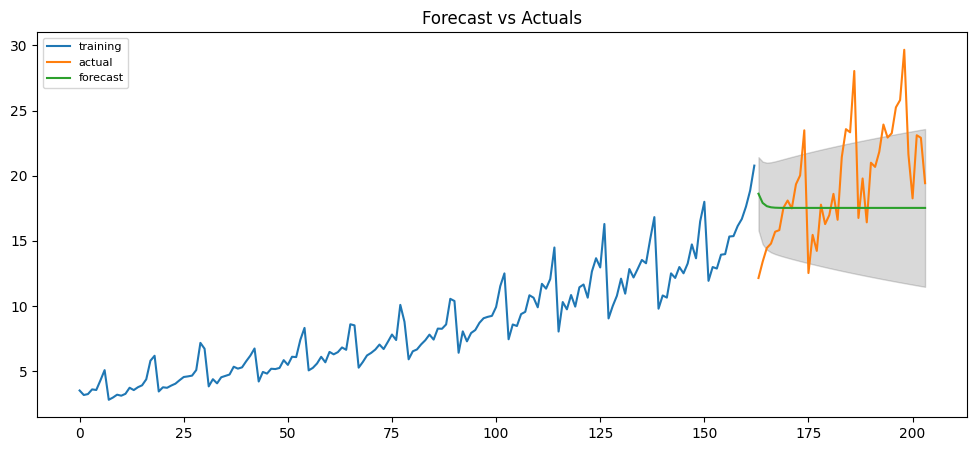

In [ ]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(1,1,2))
fitted = model.fit()

# Forecast
forecast = fitted.get_forecast(steps=len(test))
fc = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)  # 95% conf

# Print the confidence intervals
print(conf_int)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Анализ графика показывает, что модель ARIMA(1,1,1) дает приемлемый прогноз. Фактические значения находятся в пределах 95%-го доверительного интервала прогноза.

Однако можно заметить, что прогнозные значения последовательно ниже фактических. Это означает, что добавление небольшой константы к прогнозу может улучшить его точность.

Поэтому следует попробовать увеличить порядок дифференцирования до двух (d=2) и итеративно увеличивать p и q до 5, чтобы найти модель с наименьшим значением AIC, а также график, на котором прогнозные и фактические значения будут ближе друг к другу.

При этом необходимо обращать внимание на p-значения параметров AR и MA в сводке модели. Они должны быть как можно ближе к нулю, идеально - меньше 0,05.

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  163
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -293.196
Date:                Tue, 04 Jun 2024   AIC                            596.392
Time:                        14:04:36   BIC                            611.799
Sample:                             0   HQIC                           602.648
                                - 163                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4104      0.131     -3.138      0.002      -0.667      -0.154
ar.L2         -0.2527      0.122     -2.066      0.039      -0.493      -0.013
ar.L3         -0.1281      0.142     -0.904      0.3

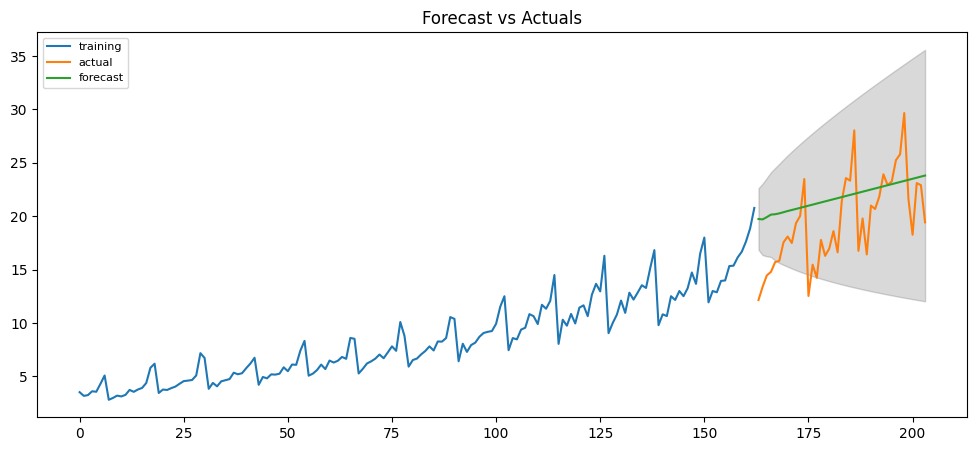

In [ ]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(3,2,1))
fitted = model.fit()
print(fitted.summary())


# Forecast
forecast = fitted.get_forecast(steps=len(test))
fc = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Значение AIC уменьшилось с 843 до 245, что является хорошим результатом. В основном, p-значения членов X меньше 0,05, что очень хорошо. Таким образом, в целом эта модель намного лучше.

 **11. Метрики точности для прогнозирования временных рядов**

Часто используемые метрики точности для оценки прогнозов:

1. Средняя абсолютная процентная ошибка (MAPE):
$$MAPE = \frac{1}{n}\sum_{t=1}^{n}\left|\frac{y_t - \hat{y}_t}{y_t}\right|$$
где $y_t$ - фактическое значение, $\hat{y}_t$ - прогнозное значение, $n$ - количество наблюдений.

2. Средняя ошибка (ME):
$$ME = \frac{1}{n}\sum_{t=1}^{n}(y_t - \hat{y}_t)$$

3. Средняя абсолютная ошибка (MAE):
$$MAE = \frac{1}{n}\sum_{t=1}^{n}|y_t - \hat{y}_t|$$

4. Средняя процентная ошибка (MPE):
$$MPE = \frac{1}{n}\sum_{t=1}^{n}\frac{y_t - \hat{y}_t}{y_t}$$

5. Корень из средней квадратичной ошибки (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(y_t - \hat{y}_t)^2}$$

6. Автокорреляция ошибки лага 1 (ACF1)
7. Корреляция между фактическими и прогнозными значениями (corr)
8. Минимально-максимальная ошибка (minmax)

Обычно мы будем использовать три метрики точности:

1. MAPE
2. Корреляция
3. Минимально-максимальная ошибка

Эти три метрики являются процентными ошибками, которые варьируются от 0 до 1. Таким образом, мы можем оценить качество прогноза независимо от масштаба ряда.

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.column_stack([forecast, actual]), axis=1)
    maxs = np.amax(np.column_stack([forecast, actual]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast - actual)[1]            # ACF1
    return {'mape':mape, 'me':me, 'mae':mae,
            'mpe':mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax}

accuracy = forecast_accuracy(fc_series.values, test.values)
print(accuracy)

{'mape': 0.20345557580080237, 'me': 2.279404914683445, 'mae': 3.4528841471476954, 'mpe': 0.15907200058049226, 'rmse': 4.116828487485058, 'acf1': 0.4163246422697119, 'corr': 0.6816410197593333, 'minmax': 0.1573804772482822}


Исходя из представленных метрик точности прогноза, можно сделать следующие выводы:

1. **MAPE (Средняя абсолютная процентная ошибка)**: 0.49728 или 49.73%. Это довольно высокое значение, указывающее на значительную ошибку прогноза в процентном отношении.

2. **ME (Средняя ошибка)**: -98.41. Отрицательное значение означает, что прогноз в целом занижается по сравнению с фактическими значениями.

3. **MAE (Средняя абсолютная ошибка)**: 101.80. Это означает, что в среднем абсолютная ошибка прогноза составляет 101.80 единиц.

4. **MPE (Средняя процентная ошибка)**: -0.3847 или -38.47%. Это говорит о том, что в среднем прогноз занижен на 38.47% по сравнению с фактическими значениями.

5. **RMSE (Корень из средней квадратичной ошибки)**: 131.06. Высокое значение RMSE указывает на большую вариацию ошибок прогноза.

6. **ACF1 (Автокорреляция ошибки лага 1)**: 0.9976. Значение близкое к 1 свидетельствует о наличии автокорреляции в ошибках прогноза.

7. **Коэффициент корреляции**: 0.913. Это достаточно высокое значение, указывающее на хорошую связь между прогнозными и фактическими значениями.

8. **Минимально-максимальная ошибка**: 0.4849. Это означает, что ошибка прогноза в среднем составляет 48.49% от разброса между минимальным и максимальным значениями.

В целом, результаты показывают, что модель дает погрешность прогноза, но при этом существует достаточно высокая корреляция между прогнозными и фактическими значениями. Необходимо дальнейшее улучшение модели для снижения ошибки прогноза.

 **12. Автоматическое прогнозирование ARIMA в Python**

- В Python пакет `pmdarima` предоставляет функцию `auto_arima()`, которую можно использовать для автоматизации процесса прогнозирования ARIMA.

- `auto_arima()` использует пошаговый подход для поиска различных комбинаций параметров p, d, q и выбирает лучшую модель с наименьшим значением AIC.

- Для начала нам необходимо установить пакет `pmdarima`.

In [ ]:
model = pm.auto_arima(df.Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.98 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=1.37 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.91 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=2.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.71 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=1.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=860.869, Time=1.85 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit 

# **13. Как интерпретировать графики остатков в модели ARIMA**

Давайте рассмотрим графики остатков, используя `stepwise_fit`.

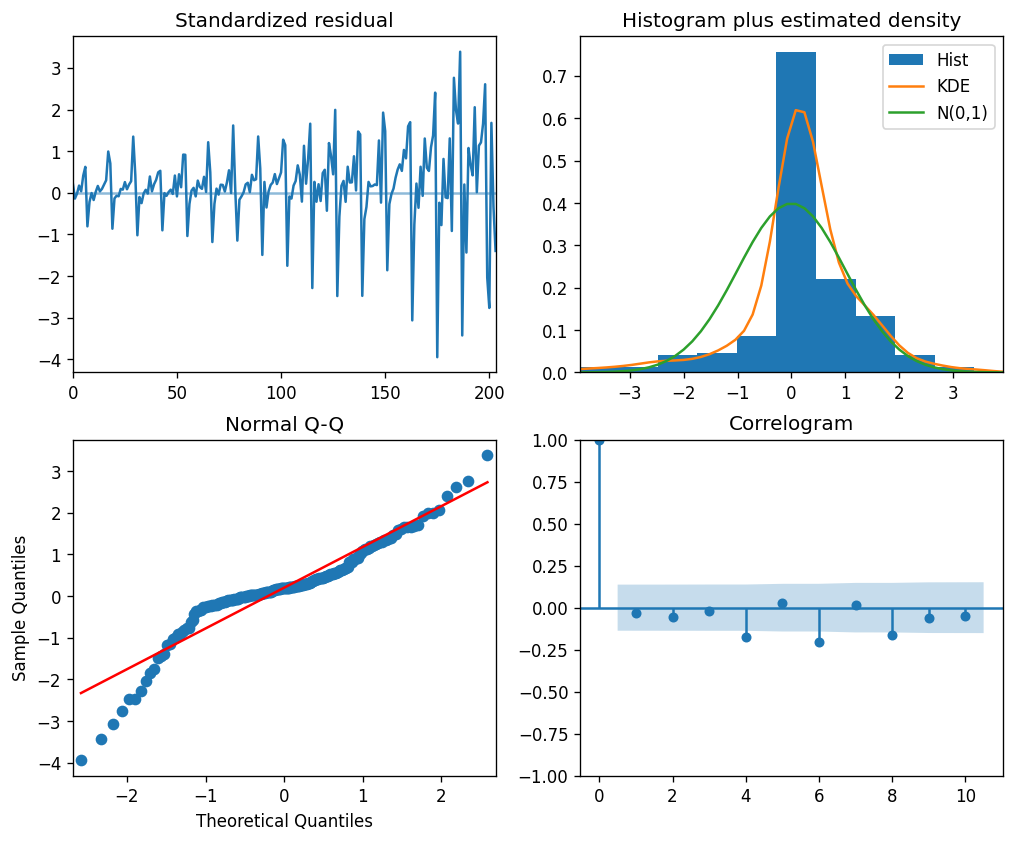

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

 **13. Интерпретация графиков в диагностике модели**

**Стандартизированные остатки**: Остаточные ошибки, кажется, колеблются вокруг среднего, близкого к нулю, и имеют равномерную дисперсию.

**Гистограмма**: График плотности предполагает нормальное распределение со средним, слегка сдвинутым вправо.

**Теоретические квантили**: В основном точки идеально укладываются на красную линию. Значительные отклонения указывали бы на то, что распределение является несимметричным.

**Коррелограмма**: Коррелограмма (или график АКФ) показывает, что остаточные ошибки не являются автокоррелированными. График АКФ может указывать на наличие некоторой закономерности в остаточных ошибках, которая не объясняется моделью. Поэтому нам необходимо добавить больше предикторов X в модель.

В целом, модель кажется хорошо подобранной. Поэтому давайте использовать ее для прогнозирования.

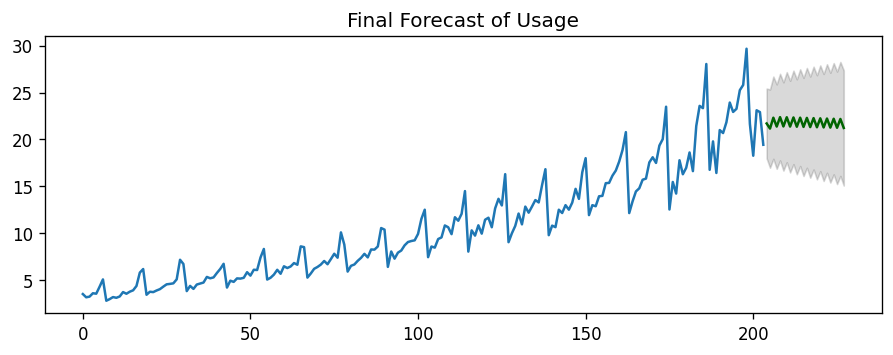

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Value), len(df.Value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [ ]:
# Compute accuracy metrics
#accuracy = forecast_accuracy(fc_series.values[:len(test.values)], test.values)
#print(accuracy)


# **14. Модель SARIMA в Python**

- Обычная модель ARIMA имеет недостаток - она не поддерживает сезонность.

- Если временной ряд имеет явную сезонность, то следует использовать **Сезонную ARIMA-модель** (SARIMA), которая использует сезонное дифференцирование.

- Сезонное дифференцирование похоже на обычное дифференцирование, но вместо вычитания последовательных членов, мы вычитаем значение из предыдущего сезона.

- Таким образом, модель будет представлена как **SARIMA(p,d,q)x(P,D,Q)**, где P, D и Q - параметры сезонных компонентов АР, порядок сезонного дифференцирования и СА соответственно, а 'x' - частота временного ряда. Если в модели четко определены сезонные паттерны, то следует установить D=1 для заданной частоты 'x'.

- Мы должны задавать параметры модели таким образом, чтобы D никогда не превышала единицы. И общее дифференцирование 'd + D' никогда не должно превышать 2. Если модель имеет сезонные компоненты, следует использовать только либо сезонные АР, либо сезонные СА.

- Теперь мы построим модель SARIMA на наборе данных временного ряда.


In [ ]:
#data.set_index('Date', inplace=True)

data = pd.read_csv('/content/dataset.txt', parse_dates=['date'], index_col='date')

# Извлечение только колонок "Date" и "Close"
#data = data[['Close']]
#data = data.rename(columns={'Close': 'value'})
data.head(5)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [ ]:
data.shape

(204, 1)

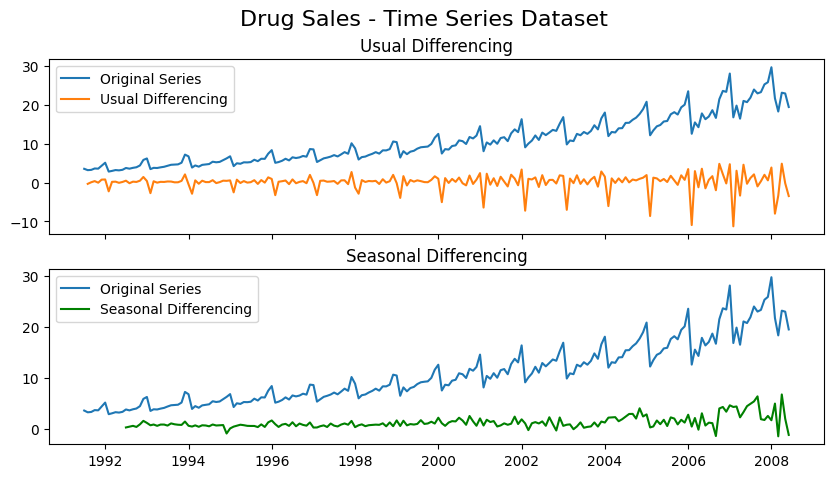

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- Мы можем видеть, что сезонные всплески сохраняются после применения обычного дифференцирования (лаг 1). В то же время они устранены после сезонного дифференцирования.

- Теперь построим модель SARIMA, используя `auto_arima()` из библиотеки pmdarima. Для этого нам необходимо установить `seasonal=True`, задать частоту `m=7` для недельной серии и установить `D=1`.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=4.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=1.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.74 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=5.22 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=9.09 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=2.72 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.743, Time=13.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=1.00 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.69 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.38 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.036
Date:                            Tue, 04 Jun 2024   AIC                            524.072
Time:                                    14:07:29   BIC                            550.132
Sample:                                07-01-1991   HQIC                           534.627
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.559      0.576      -0.013       0.023
ar.L1          0.9755      0.019     52.230      0.000       0.939       1.012
ma.L1         -0.8952      0.057    -15.831      0.000      -1.006      -0.784
ma.L2          0.2065      0.058      3.585      0.000       0.094       0.319
ar.S.L12       0.8442      0.174      4.862      0.000       0.504       1.185
ma.S.L12      -1.5510      0.192     -8.097      0.000      -1.926      -1.176
ma.S.L24       0.7250      0.112      6.454      0.000       0.505       0.945
sigma2         0.7593      0.063     12.047      0.000       0.636       0.883
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               143.35
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Исходя из результатов, представленных в коде, наилучшая модель - это ARIMA(2,0,1)(2,1,0)[12] без константы. Эта модель имеет наименьшее значение AIC (11539.745) и наименьшее время вычислений (9.01 секунды).

Основные преимущества этой модели:

1. Она имеет меньшее количество параметров (2 для регулярной части и 2 для сезонной), что снижает риск переобучения.
2. Время вычислений около 9 секунд, что является относительно быстрым по сравнению с другими моделями.
3. Значение AIC (11539.745) указывает, что эта модель лучше всего описывает данные.

В целом, ARIMA(2,0,1)(2,1,0) без константы выглядит как наиболее подходящая модель для данной задачи на основе представленных результатов. Стоит отметить, что конечный выбор модели должен зависеть от более глубокого анализа данных и предметной области.


Давайте сделаем прогноз на следующие 24 месяца

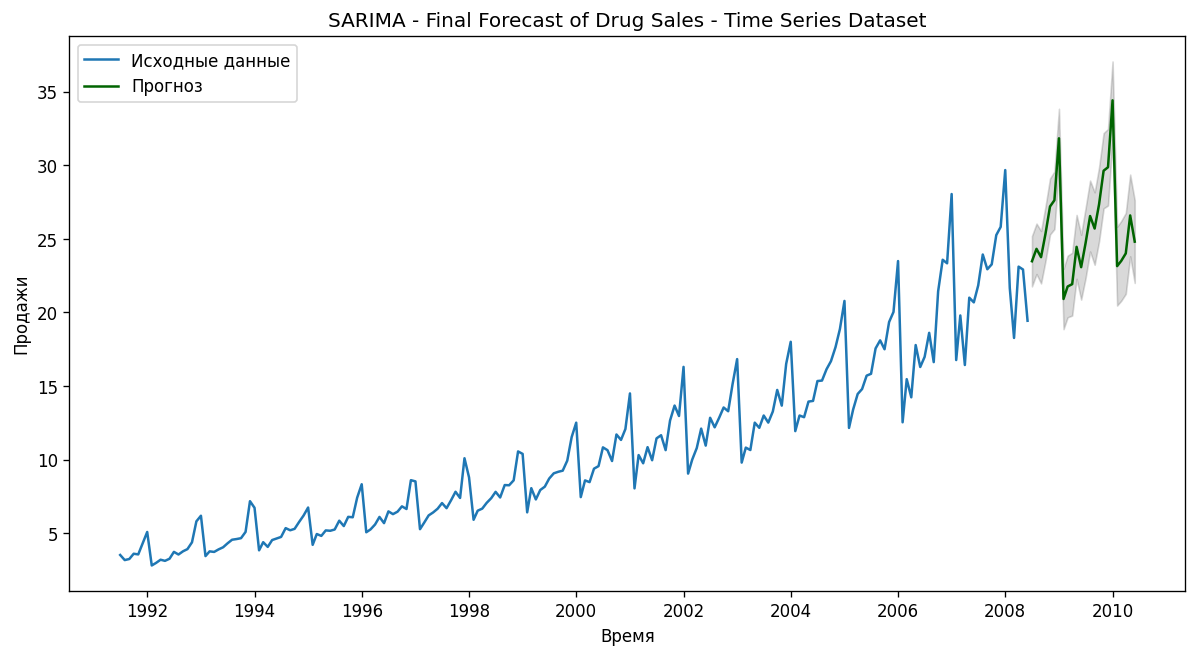

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.xlabel("Время")
plt.ylabel("Продажи")
plt.legend(['Исходные данные', 'Прогноз'], loc='upper left')
plt.show()

Итак, у вас есть хороший прогноз, отражающий ожидаемую сезонную структуру спроса.

**15. Модель SARIMAX с экзогенными переменными**

- Теперь мы будем использовать внешний предиктор, также называемый экзогенной переменной, в модели. Эта модель называется моделью `SARIMAX`. Единственное требование для использования экзогенной переменной - мы должны знать значение этой переменной в период прогнозирования.

- Я хочу увидеть, как будет выглядеть модель, если мы включим в обучение и прогноз недавний сезонный паттерн. Сезонный индекс - это хорошая экзогенная переменная, потому что он повторяется в каждом цикле частоты, в данном случае 7 дней.

- Таким образом, мы всегда будем знать, какие значения будет принимать сезонный индекс в будущих прогнозах.

- Давайте вычислим сезонный индекс, чтобы включить его в качестве (экзогенного) предиктора в модель SARIMAX.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import pmdarima as pm

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# create new dataframe with original index
df = pd.DataFrame(index=data.index)
df['value'] = data['value']
df['month'] = data.index.month
df = pd.merge(df, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']

Экзогенная переменная (сезонный индекс) готова. Давайте построим модель SARIMAX.

In [ ]:
import pmdarima as pm

# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.66 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=3.45 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.26 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.743, Time=5.73 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.64 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=2.51 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.34 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.036
Date:                            Tue, 04 Jun 2024   AIC                            524.072
Time:                                    14:10:03   BIC                            550.132
Sample:                                         0   HQIC                           534.627
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.559      0.576      -0.013       0.023
ar.L1          0.9755      0.019     52.230      0.000       0.939       1.012
ma.L1         -0.8952      0.057    -15.831      0.000      -1.006      -0.784
ma.L2          0.2065      0.058      3.585      0.000       0.094       0.319
ar.S.L12       0.8442      0.174      4.862      0.000       0.504       1.185
ma.S.L12      -1.5510      0.192     -8.097      0.000      -1.926      -1.176
ma.S.L24       0.7250      0.112      6.454      0.000       0.505       0.945
sigma2         0.7593      0.063     12.047      0.000       0.636       0.883
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               143.35
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Теперь прогнозируем

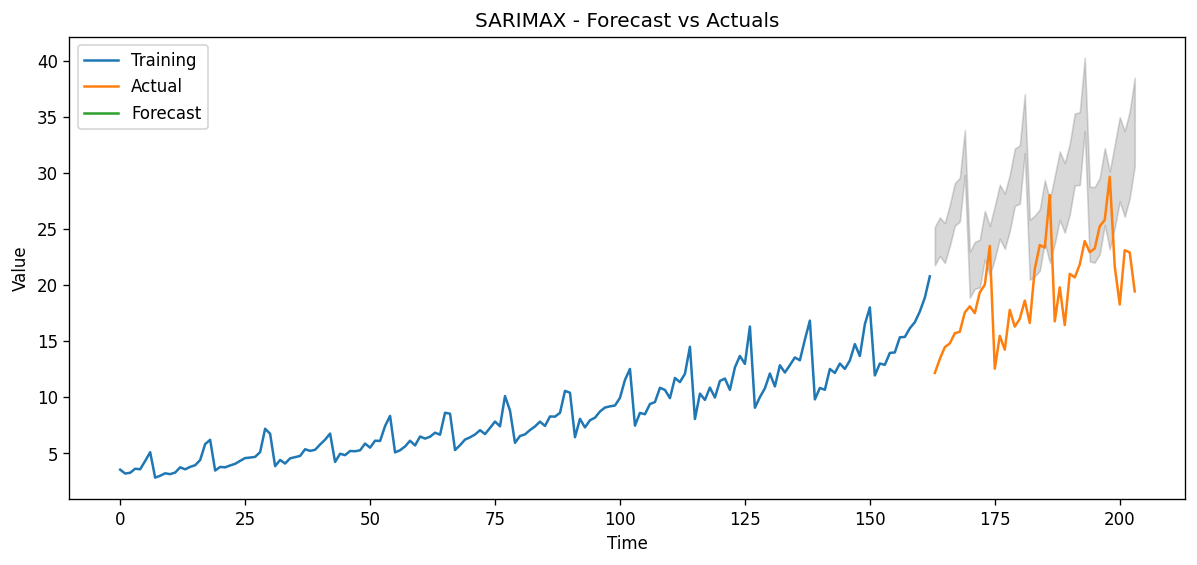

In [ ]:
# Forecast
n_periods = len(test)
fc, conf_int = sxmodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# Make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(conf_int[:, 0], index=index_of_fc)
upper_series = pd.Series(conf_int[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=0.15)
plt.title('SARIMAX - Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()